<a href="https://colab.research.google.com/github/NugPath23/Jaringan-Syaraf-Tiruan/blob/main/Pertemuan7/Tugas_JST_Pertemuan_7_2311531008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Membaca dataset
pd = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Menampilkan 5 baris pertama
pd.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Mengecek informasi umum
pd.info()

# Mengecek nilai kosong
print(pd.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# Mengubah semua kolom kategorikal menjadi numerik
le = LabelEncoder()
for col in pd.columns:
    if pd[col].dtype == 'object':
        pd[col] = le.fit_transform(pd[col])

# Normalisasi fitur numerik
scaler = StandardScaler()
X = pd.drop('NObeyesdad', axis=1)
y = pd['NObeyesdad']

X_scaled = scaler.fit_transform(X)
y_encoded = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Arsitektur Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden Layer 1
    Dense(32, activation='relu'),                                   # Hidden Layer 2
    Dense(y_train.shape[1], activation='softmax')                   # Output Layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2576 - loss: 1.9194 - val_accuracy: 0.4083 - val_loss: 1.6630
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4103 - loss: 1.6061 - val_accuracy: 0.5089 - val_loss: 1.3563
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5316 - loss: 1.2957 - val_accuracy: 0.5888 - val_loss: 1.1106
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6003 - loss: 1.1312 - val_accuracy: 0.6864 - val_loss: 0.9454
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7273 - loss: 0.9079 - val_accuracy: 0.7337 - val_loss: 0.8345
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7341 - loss: 0.7814 - val_accuracy: 0.7692 - val_loss: 0.7413
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7844 - loss: 0.6648 - val_accuracy: 0.7899 - val_loss: 0.6632
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7716 - loss: 0.6354 - val_accuracy: 0.7929 - val_loss

In [ ]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy:.4f}")

# Prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Metrik
print("F1-score:", f1_score(y_true, y_pred_classes, average='weighted'))
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9245 - loss: 0.1936 
Akurasi: 0.9267
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
F1-score: 0.9263552522349546

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.85      0.84      0.85        62
           2       0.96      0.96      0.96        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.85      0.84      0.85        56
           6       0.92      0.88      0.90        50

    accuracy                           0.93       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.93      0.93      0.93       423



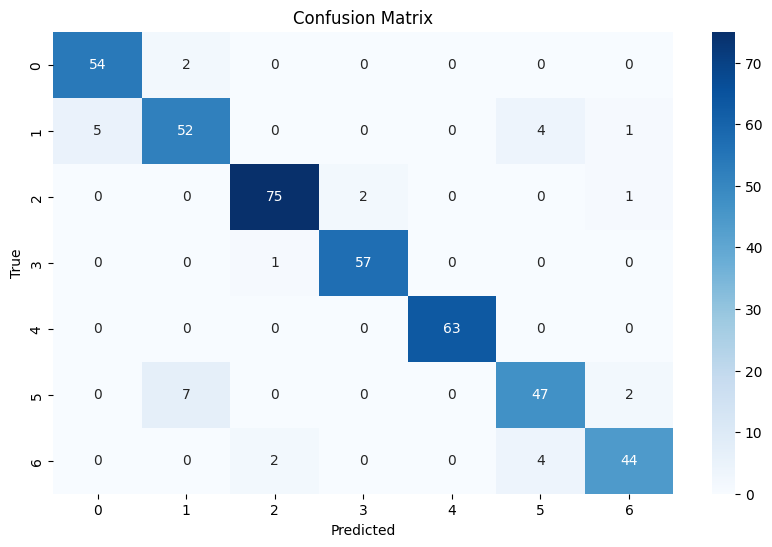

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

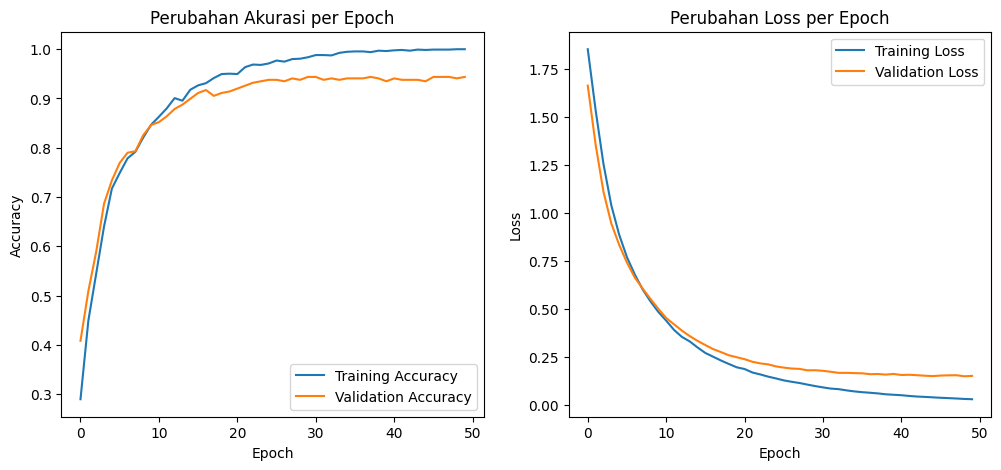

In [ ]:
# Menampilkan grafik akurasi dan loss per epoch
plt.figure(figsize=(12,5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Perubahan Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perubahan Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()